In [1]:
import pandas as pd

## Objective
In this checkpoint, we are going to work on the Titanic data set to predict if a passenger will survive or not using several classification algorithms of supervised learning. We will start by logistic regression, knn, then decision tree and we finalize by random forest.

Instructions

Part 1 Logistic Regression

1. Apply logistic regression. 

2. Use confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case

Part 2 KNN

1.  Apply the KNN and predict your model

2. Choose the optimal number of neighbors

Part 3:  Decision tree and random forest

1. Apply decision tree and predict you model

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.

In [30]:
data = pd.read_csv('titanicpassengers.csv', sep = ';')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
#Preprocessing our data
def preprocess_data(data):
    data['Age'].fillna(data['Age'].mean(),inplace=True)
    data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    data['Cabin']=data.Cabin.fillna('G6')
    data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return data
data=preprocess_data(data)

In [5]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.000000,2,0,3101276,7.9250,G6,S
6,576,0,3,"Patchett, Mr. George",1,19.000000,0,0,358585,14.5000,G6,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.000000,0,2,2653,15.7417,G6,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.500000,0,0,A/5 21173,7.2500,G6,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.000000,1,0,SC/AH 3085,26.0000,G6,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [9]:
data['Embarked'] = data['Embarked'].fillna('S')

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##  Logistic Regression

In [11]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [12]:
#features extraction

x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1) #Drop all Categorical data ('Survived was dropped so x wont take it as a feature)
y= data["Survived"]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


In [14]:
import seaborn as sns

Predicted    0   1
Actual            
0          128  16
1           21  58


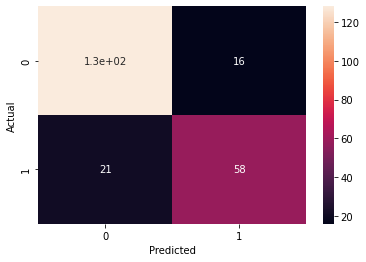

In [15]:
#Using Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print(confusion_matrix)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       144
           1       0.78      0.73      0.76        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



## ROC / AUC

In [17]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
fpr, tpr, _= roc_curve(y_test, random_probs, pos_label=1)
print(fpr, tpr, _)

[0. 1.] [0. 1.] [1 0]


In [18]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, y_pred)

print(auc_score)

0.8115330520393811


In [19]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

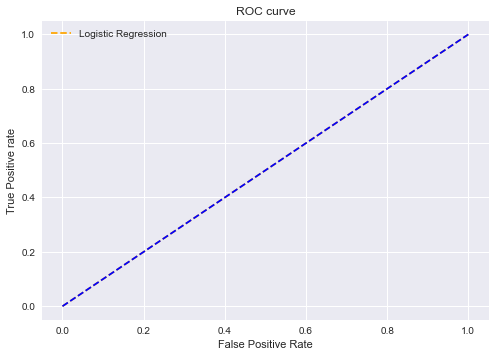

In [20]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr, tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

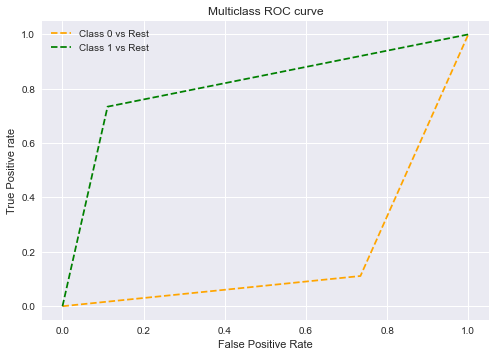

In [21]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

##  KNN

In [22]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20%

In [23]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.6089385474860335


In [24]:
knn=KNeighborsClassifier(n_neighbors=10) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.5865921787709497


In [25]:
knn=KNeighborsClassifier(n_neighbors=3) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.5977653631284916


In [26]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.61
Accuracy for k= 2 is: 0.6
Accuracy for k= 3 is: 0.6
Accuracy for k= 4 is: 0.6
Accuracy for k= 5 is: 0.58
Accuracy for k= 6 is: 0.59
Accuracy for k= 7 is: 0.58
Accuracy for k= 8 is: 0.59
Accuracy for k= 9 is: 0.59
Accuracy for k= 10 is: 0.59
Accuracy for k= 11 is: 0.6
Accuracy for k= 12 is: 0.6
Accuracy for k= 13 is: 0.62
Accuracy for k= 14 is: 0.61
Accuracy for k= 15 is: 0.59
Accuracy for k= 16 is: 0.61
Accuracy for k= 17 is: 0.62
Accuracy for k= 18 is: 0.6
Accuracy for k= 19 is: 0.63
Accuracy for k= 20 is: 0.61
Accuracy for k= 21 is: 0.61
Accuracy for k= 22 is: 0.6
Accuracy for k= 23 is: 0.61
Accuracy for k= 24 is: 0.6
Accuracy for k= 25 is: 0.6
Accuracy for k= 26 is: 0.6
Accuracy for k= 27 is: 0.61
Accuracy for k= 28 is: 0.6
Accuracy for k= 29 is: 0.61


Optimal K Value

Choosing the right value of K can be really tricky, one of the ways to make that process easier is running a ”for loop“and trying out different values of K. And then we choose the lowest one which has the highest accuracy.

In Best Pratice your k value should be old.

The lowest one which has the highest accuracy will K = 5

Text(0, 0.5, 'Testing Accuracy')

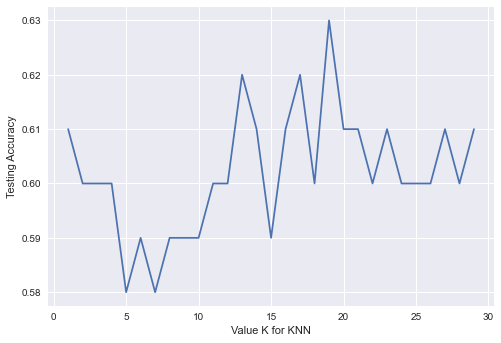

In [54]:
plt.plot(range(1,30), scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

##  Decision tree and random forest

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=30)
#applying tree algorithm
model = tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7430167597765364


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=20)
#applying tree algorithm
model = tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7052238805970149


In [35]:
from sklearn.tree import export_graphviz



In [36]:
dataa = export_graphviz(model, out_file=None)

In [ ]:
pip install graphviz

In [37]:
import graphviz

[Text(0.3333375336021505, 0.96875, 'X[2] <= 0.5\ngini = 0.465\nsamples = 579\nvalue = [366, 213]'),
 Text(0.1403225806451613, 0.90625, 'X[1] <= 2.5\ngini = 0.397\nsamples = 198\nvalue = [54, 144]'),
 Text(0.060215053763440864, 0.84375, 'X[6] <= 26.125\ngini = 0.111\nsamples = 102\nvalue = [6, 96]'),
 Text(0.043010752688172046, 0.78125, 'X[3] <= 55.5\ngini = 0.234\nsamples = 37\nvalue = [5, 32]'),
 Text(0.034408602150537634, 0.71875, 'X[0] <= 49.5\ngini = 0.198\nsamples = 36\nvalue = [4, 32]'),
 Text(0.025806451612903226, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.043010752688172046, 0.65625, 'X[6] <= 25.965\ngini = 0.157\nsamples = 35\nvalue = [3, 32]'),
 Text(0.025806451612903226, 0.59375, 'X[3] <= 25.5\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.017204301075268817, 0.53125, 'X[3] <= 23.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.008602150537634409, 0.46875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.025806451612903226, 0.46875, 'X[0] 

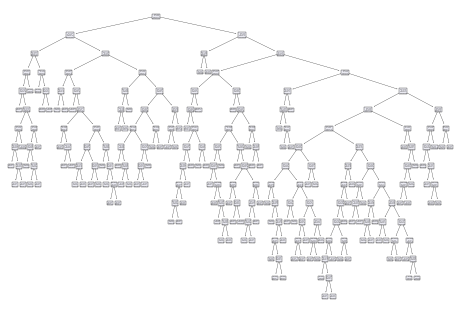

In [40]:
from sklearn import tree   

tree.plot_tree(model)

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [42]:
y_predi = classifier.predict(x_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[149  34]
 [ 55  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       183
           1       0.69      0.57      0.62       129

    accuracy                           0.71       312
   macro avg       0.71      0.69      0.70       312
weighted avg       0.71      0.71      0.71       312

Accuracy: 0.7147435897435898


In [45]:
import seaborn as sns

Predicted    0   1
Actual            
0          149  34
1           55  74


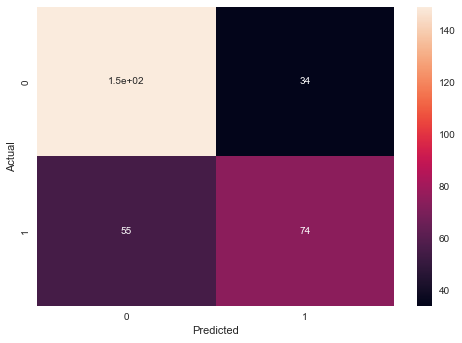

In [46]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 70)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=70)

In [51]:
y_predi = classifier.predict(x_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[149  34]
 [ 55  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       183
           1       0.69      0.57      0.62       129

    accuracy                           0.71       312
   macro avg       0.71      0.69      0.70       312
weighted avg       0.71      0.71      0.71       312

Accuracy: 0.7147435897435898


Predicted    0   1
Actual            
0          149  34
1           55  74


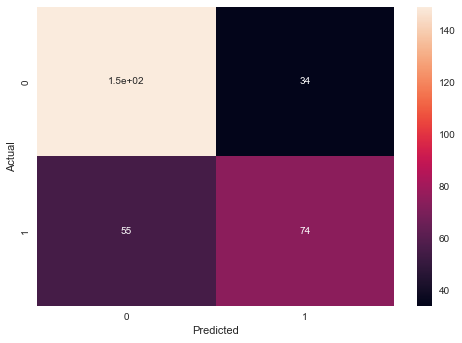

In [53]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [58]:
# Random Forest model using k-fold split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 10)
kf = KFold(n_splits = 10, random_state = 80, shuffle = True)
scores = cvs(rf_model, x, y, cv = kf)
print(scores)
print(sum(scores/10))

[0.8        0.85393258 0.79775281 0.82022472 0.82022472 0.87640449
 0.83146067 0.75280899 0.80898876 0.82022472]
0.8182022471910112
